# <font face = 'Impact' color = '#FFAEBC' > Sample Demonstration on Multiple Regression <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a backgrounder on doing Multiple Regression in Python. From assumption checks to modeling via the Ordinary Least Squares Method, it aims to equip learners with a solid take on learning and applying this data analysis approach for data driven decision making.

In [1]:
# Load necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import qdesc as qd
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
df = pd.read_excel("ProductSold.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    150 non-null    float64
 1   AdSpend  150 non-null    float64
 2   Traffic  150 non-null    float64
 3   Sales    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [3]:
df.head()

,Price,AdSpend,Traffic,Sales
0,98.752843,7489.068263,321.793789,3566.079254
1,70.029753,16714.969070,284.052151,4531.112120
2,65.879602,9298.049251,331.524402,4060.098612
3,88.592034,9597.046300,192.375328,3213.090378
4,100.362828,14978.921980,226.744189,3828.542093


In [4]:
# Fit multiple regression model
X = df[['Price', 'AdSpend', 'Traffic']]
X = sm.add_constant(X)
y = df['Sales']
model = sm.OLS(y, X).fit()

In [5]:
# Check Residual Normality - Preparation
residuals = model.resid # retrieve residuals
res = pd.DataFrame(residuals) # convert to dataframe
res.rename(columns={0: 'Residuals'}, inplace=True) # rename columns
res.head()

,Residuals
0,-1.843857
1,-0.401096
2,-0.384238
3,0.256584
4,-0.114717



--- Variable: Residuals ---
  Anderson-Darling Statistic : 0.2405
  Critical Value (@ 5.0%) : 0.7670
  Decision : Fail to Reject Null


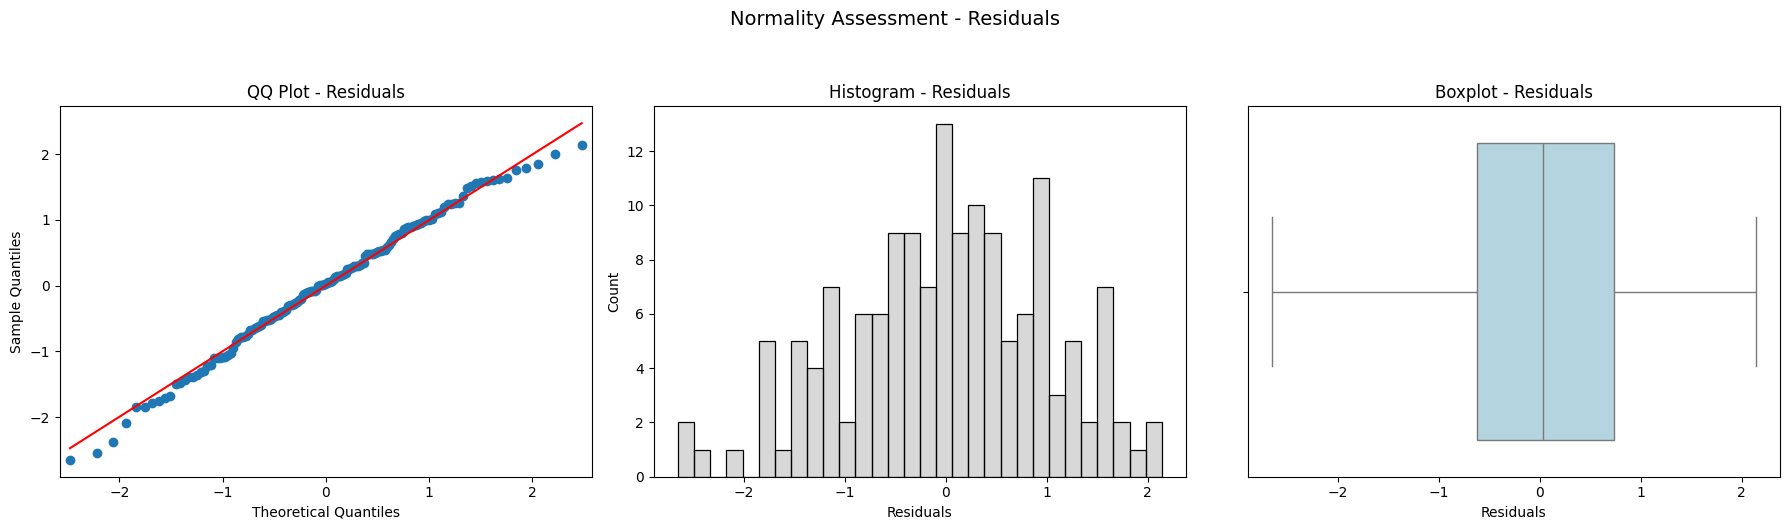

In [6]:
# Check Residual Normality - Normality Testing
qd.normcheck_dashboard(res)

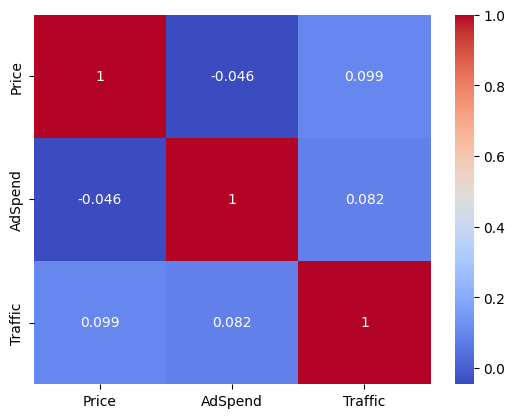

In [7]:
# Create a heatmap to check for Multicollinearity
sns.heatmap(df[['Price', 'AdSpend', 'Traffic']].corr(), annot=True, cmap='coolwarm')
plt.show()

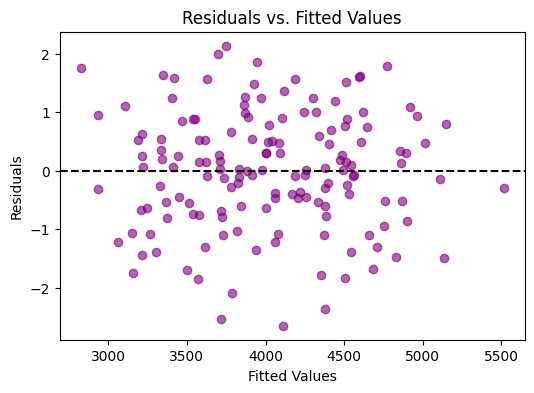

In [8]:
# Check Homoscedasticity (constant variance of residuals) - Visualization
plt.figure(figsize=(6, 4))
plt.scatter(model.fittedvalues, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

In [9]:
# Check Homoscedasticity (constant variance of residuals) - Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)
print(f"Breusch-Pagan test p-value: {bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("Homoscedasticity assumption holds (fail to reject H0)")
else:
    print("Heteroscedasticity detected (reject H0)")

Breusch-Pagan test p-value: 0.5436
Homoscedasticity assumption holds (fail to reject H0)


In [10]:
# Retrieve df original variables: Price, AdSpend, Traffic
features = ['Price', 'AdSpend', 'Traffic']

# Standardize the explanatory variables
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(df[features])

# Retain original column names
X_scaled = pd.DataFrame(X_scaled_array, columns=features)

# Add intercept
X_scaled = sm.add_constant(X_scaled)

# Fit the model
y = df['Sales']
model_std = sm.OLS(y, X_scaled).fit()

# Summary
print(model_std.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.480e+07
Date:                Fri, 10 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:55:48   Log-Likelihood:                -212.60
No. Observations:                 150   AIC:                             433.2
Df Residuals:                     146   BIC:                             445.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4020.4608      0.083   4.87e+04      0.0